# Handwritten Digits recognition

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 20s 2us/step


In [5]:
len(X_train)

60000

In [7]:
len(X_test)

10000

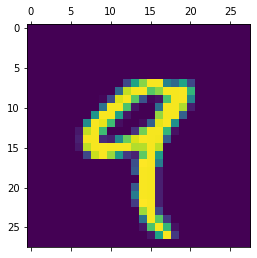

In [13]:
plt.matshow(X_train[4])

In [16]:
y_train[4]

9

In [41]:
X_train = X_train/255
X_test = X_test/255

In [42]:
X_train.shape

(60000, 28, 28)

In [43]:
X_train_flat = X_train.reshape(len(X_train),28*28)
X_test_flat = X_test.reshape(len(X_test),28*28)

In [44]:
X_test_flat.shape

(10000, 784)

Basic_Preprocessing_for_image

In [45]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784,),activation = 'sigmoid')
])


### It is important to add compiler
#### and after evaluating model on test set we will test it on X_test

In [47]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_flat,y_train,epochs = 10) 

Epoch 1/10
1875/1875 [==============================] - 2s 937us/step - loss: 0.2604 - accuracy: 0.9263
Epoch 2/10
1875/1875 [==============================] - 2s 994us/step - loss: 0.2612 - accuracy: 0.9283
Epoch 3/10
1875/1875 [==============================] - 2s 899us/step - loss: 0.2469 - accuracy: 0.9325
Epoch 4/10
1875/1875 [==============================] - 2s 905us/step - loss: 0.2534 - accuracy: 0.9297
Epoch 5/10
1875/1875 [==============================] - 2s 900us/step - loss: 0.2505 - accuracy: 0.9302
Epoch 6/10
1875/1875 [==============================] - 2s 901us/step - loss: 0.2465 - accuracy: 0.9319
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2377 - accuracy: 0.9327
Epoch 8/10
1875/1875 [==============================] - 2s 944us/step - loss: 0.2421 - accuracy: 0.9343
Epoch 9/10
1875/1875 [==============================] - 2s 927us/step - loss: 0.2374 - accuracy: 0.9344
Epoch 10/10
1875/1875 [==============================] - 2s 928us/

##### Model Evaluation on test set

In [49]:
model.evaluate(X_test_flat,y_test) 

313/313 [==============================] - 0s 724us/step - loss: 0.2630 - accuracy: 0.9280


[0.2629817724227905, 0.9279999732971191]

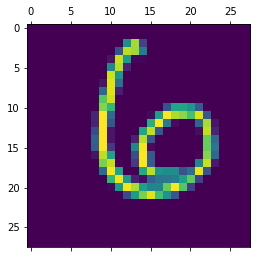

In [84]:
plt.matshow(X_test[100])

In [76]:
Y_pred = model.predict(X_test_flat)

In [79]:
import numpy as np

In [85]:
np.argmax(Y_pred[100])

6

In [86]:
Y_pred = [np.argmax(i) for i in Y_pred]
Y_pred[:5]

[7, 2, 1, 0, 4]

In [99]:
cm = tf.math.confusion_matrix(labels = y_test,predictions = Y_pred)

Text(69.0, 0.5, 'Truth')

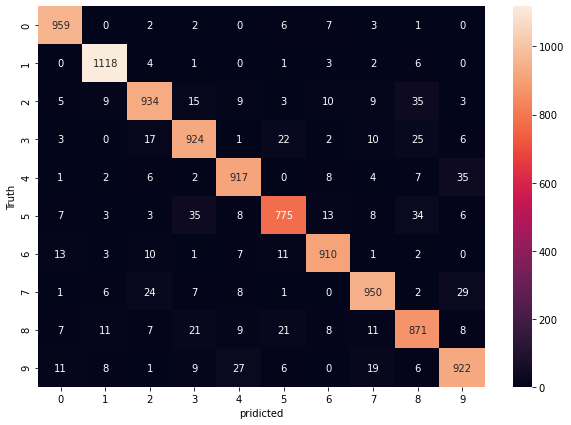

In [100]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('pridicted')
plt.ylabel('Truth')

# Added Hidden Layer with 100 neurons

In [102]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape = (784,),activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_flat,y_train,epochs = 10) 

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4429 - accuracy: 0.8732
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1325 - accuracy: 0.9606
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0866 - accuracy: 0.9746
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0634 - accuracy: 0.9811
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0476 - accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0409 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0297 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0245 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0212 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.017

In [103]:
model.evaluate(X_test_flat,y_test) 

313/313 [==============================] - 0s 900us/step - loss: 0.0785 - accuracy: 0.9776


[0.07848551869392395, 0.9775999784469604]

In [105]:
Y_pred = model.predict(X_test_flat)
Y_pred = [np.argmax(i) for i in Y_pred]
Y_pred[:5]

[7, 2, 1, 0, 4]

In [106]:
cm = tf.math.confusion_matrix(labels = y_test,predictions = Y_pred)

Text(69.0, 0.5, 'Truth')

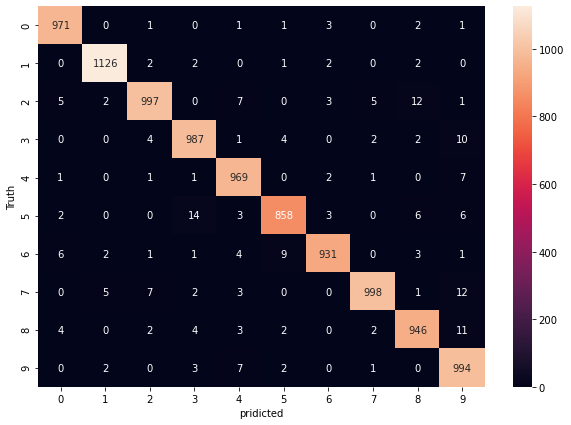

In [107]:
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('pridicted')
plt.ylabel('Truth')

In [109]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_flat,y_train,epochs = 10) 

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4651 - accuracy: 0.8673
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1275 - accuracy: 0.9637
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0848 - accuracy: 0.9746
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0644 - accuracy: 0.9810
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0469 - accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0374 - accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0295 - accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0264 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0209 - accuracy: 0.9935
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.017